<a href="https://colab.research.google.com/github/panghanwu/scikit-learning_Elwing/blob/main/RF%26kNN_kaggle_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from urllib.request import urlretrieve

url = 'https://github.com/Elwing-Chou/ml0930/raw/master/titanic/train.csv'
urlretrieve(url, 'train.csv')
url = 'https://github.com/Elwing-Chou/ml0930/raw/master/titanic/test.csv'
urlretrieve(url, 'test.csv')

('test.csv', <http.client.HTTPMessage at 0x7fd6cd0021d0>)

In [2]:
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
# train, test合併處理
datas = pd.concat([train_df, test_df], axis=0, ignore_index=True)
datas

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
datas = datas.drop(['PassengerId', 'Survived'], axis=1)
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


數值: Age, SibSP, Parch, Ticket(同張票號的數量)  
類別: Pclass, Name(稱謂), Sex, Cabin(字首), Embark

In [5]:
# 檢測是否有缺值
datas.isna()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,True,False,False,False,False,True,False
1305,False,False,False,False,False,False,False,False,False,False
1306,False,False,False,False,False,False,False,False,True,False
1307,False,False,False,True,False,False,False,False,True,False


In [6]:
na = datas.isna().sum()
na

Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [7]:
# 篩選 Series[True/False list/series]
na[na > 0].sort_values(ascending=False) # 篩選後排列

Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

In [8]:
# Embarked
datas['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [9]:
# 取眾數
most_embarked = datas['Embarked'].value_counts().idxmax()
most_embarked

'S'

In [10]:
# 用眾數的補缺失值
datas['Embarked'] = datas['Embarked'].fillna(most_embarked)

In [11]:
# Ticket
dic = datas['Ticket'].value_counts()
dic

CA. 2343    11
1601         8
CA 2144      8
347082       7
3101295      7
            ..
694          1
330959       1
PC 17610     1
330968       1
370374       1
Name: Ticket, Length: 929, dtype: int64

In [12]:
def count(n):
  return dic[n]
datas['Ticket'] = datas['Ticket'].apply(count)
datas['Ticket']

0       1
1       2
2       1
3       2
4       1
       ..
1304    1
1305    3
1306    1
1307    1
1308    3
Name: Ticket, Length: 1309, dtype: int64

In [13]:
datas.median()

Pclass     3.0000
Age       28.0000
SibSp      0.0000
Parch      0.0000
Ticket     1.0000
Fare      14.4542
dtype: float64

In [14]:
# Pclass為類別使用眾數
med = datas.median().drop(['Pclass'])
med

Age       28.0000
SibSp      0.0000
Parch      0.0000
Ticket     1.0000
Fare      14.4542
dtype: float64

In [15]:
# 補中位數進數值欄位
datas = datas.fillna(med)
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,1,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,2,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,1,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,2,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,1,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,28.0,0,0,1,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,3,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,1,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,28.0,0,0,1,8.0500,NaN,S


In [16]:
# 檢查剩餘的缺失項
na = datas.isna().sum()
na[na > 0].sort_values(ascending=False)

Cabin    1014
dtype: int64

In [17]:
# Cabin
def cabin(c):
  if pd.isna(c):
    return None
  else:
    return c[0]

datas['Cabin'] = datas['Cabin'].apply(cabin)
datas['Cabin']

0       None
1          C
2       None
3          C
4       None
        ... 
1304    None
1305       C
1306    None
1307    None
1308    None
Name: Cabin, Length: 1309, dtype: object

## 類別使用One-Hot Encoding
- 缺失值要補或不補需視視情況。一般來說，資料缺失過多的話就不會補。
- 有層級關係的欄位(如Pclass)，可以不用one-hot encoding。
- 二元資料的欄位也可不做one-hot encoding。
- 太過稀少的類別，在不影響統計的前提下，可以刪除。

In [18]:
datas['Name']

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [19]:
def name(n):
  mid = n.split(',')[-1].split('.')[0]  # 拿逗號後面 點前面
  mid = mid.strip()  # 去掉兩邊空白
  return mid
middle = datas['Name'].apply(name)
counts = middle.value_counts()
counts

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Ms                2
Major             2
Mlle              2
Lady              1
Don               1
the Countess      1
Sir               1
Mme               1
Dona              1
Capt              1
Jonkheer          1
Name: Name, dtype: int64

In [20]:
reserved = counts[:4].index
reserved

Index(['Mr', 'Miss', 'Mrs', 'Master'], dtype='object')

In [21]:
# 篩選有份量的類別
def name2(mid):
  if mid in reserved:
    return mid
  else:
    return None

datas['Name'] = middle.apply(name2)
datas['Name']

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      None
1306        Mr
1307        Mr
1308    Master
Name: Name, Length: 1309, dtype: object

In [22]:
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,1,7.2500,None,S
1,1,Mrs,female,38.0,1,0,2,71.2833,C,C
2,3,Miss,female,26.0,0,0,1,7.9250,None,S
3,1,Mrs,female,35.0,1,0,2,53.1000,C,S
4,3,Mr,male,35.0,0,0,1,8.0500,None,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,Mr,male,28.0,0,0,1,8.0500,None,S
1305,1,None,female,39.0,0,0,3,108.9000,C,C
1306,3,Mr,male,38.5,0,0,1,7.2500,None,S
1307,3,Mr,male,28.0,0,0,1,8.0500,None,S


In [23]:
# 自動全部one-hot encoding
datas = pd.get_dummies(datas)
# Pclass做one-hot encoding
datas = pd.get_dummies(datas, columns=['Pclass'])
datas

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [24]:
# Family size = SibSp +	Parch 多一個合理的推測資料
datas['Family'] = datas['SibSp'] + datas['Parch']
datas

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


# Ensemble
- 平行組合: 票多者勝。
- 使用不同演算法做平行組合並沒有別有效果，難度還較高。
- 隨機森林: 隨機放棄部分資料，長出不同結構的樹，將所有結果集合起來，可有效避免過擬和。

# Cross validation
- 交叉驗證
- 將資料集分成n份，輪流取其中一份作為testing data，將n次的結果作平均。
- 有效降低因testing data不佳所造成的誤判。
- 經驗法則n=10。

In [25]:
# 將資料切回來
x_train = datas.iloc[:len(train_df)]
x_predict = datas.iloc[len(train_df):]
y_train = train_df['Survived']
x_predict

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
891,34.5,0,0,1,7.8292,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
892,47.0,1,0,1,7.0000,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
893,62.0,0,0,1,9.6875,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
894,27.0,0,0,1,8.6625,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
895,22.0,1,1,2,12.2875,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 搜索最佳參數
params = {
    'n_estimators':range(20, 100),
    'max_depth':range(4, 11)
}

clf = RandomForestClassifier(n_estimators=25, max_depth=5, random_state=6)
cv = GridSearchCV(clf, params, cv=10, n_jobs=-1)  # n_jobs: 多核平行運算
cv.fit(x_train, y_train)
print(cv.best_score_)
print(cv.best_params_)


0.8373033707865168
{'max_depth': 7, 'n_estimators': 66}


In [27]:
from sklearn.model_selection import cross_val_score
import numpy as np

# 微調
clf = RandomForestClassifier(n_estimators=66, max_depth=7)
# 交叉驗證
scores = cross_val_score(clf, x_train, y_train, cv=10, n_jobs=-1)  
print(scores)
print(np.average(scores))
# cross_val_score按照資料順序切 並非隨機切

[0.82222222 0.8988764  0.73033708 0.8988764  0.88764045 0.83146067
 0.84269663 0.7752809  0.86516854 0.83146067]
0.8384019975031209


In [28]:
clf = RandomForestClassifier(n_estimators=66, max_depth=7)
clf.fit(x_train, y_train)
pre = clf.predict(x_predict)
df = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': pre
})
df.to_csv('rf.csv', encoding='utf-8', index=False)
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [29]:
clf.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=7, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1947513069, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=7, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=753639084, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=7, max_featur

In [30]:
clf.estimators_[0]
pd.DataFrame({
    'columns':x_train.columns,
    'importance':clf.feature_importances_
}).sort_values('importance', axis=0, ascending=False)

,columns,importance
10,Sex_male,0.158212
7,Name_Mr,0.151847
9,Sex_female,0.119502
4,Fare,0.110276
0,Age,0.078338
24,Pclass_3,0.057990
3,Ticket,0.057062
25,Family,0.044053
22,Pclass_1,0.035720
1,SibSp,0.026820


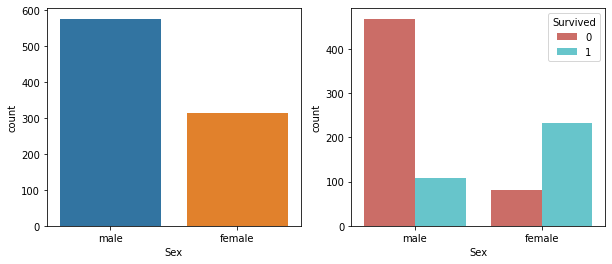

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x=train_df['Sex'])
plt.subplot(1,2,2)
sns.countplot(x=train_df['Sex'], hue=train_df['Survived'], palette='hls')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

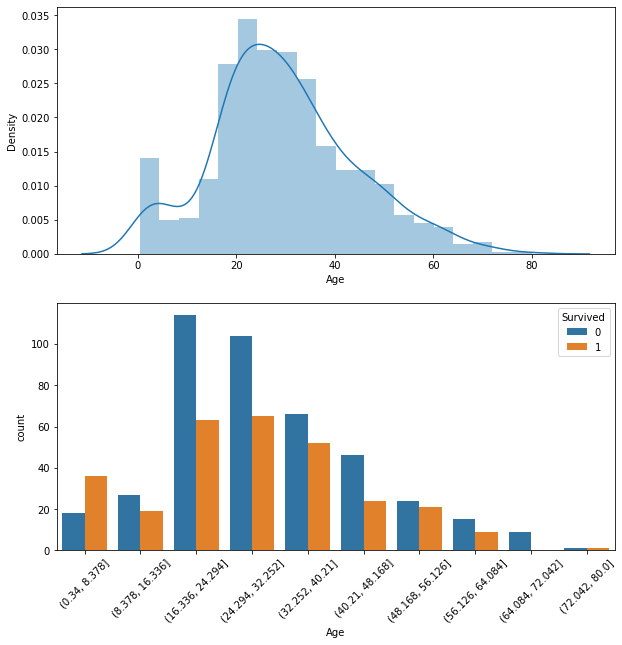

In [32]:
plt.figure(figsize=(10, 10))
plt.subplot(2,1,1)
sns.distplot(train_df['Age'])
c = pd.cut(train_df['Age'], bins=10)
plt.subplot(2,1,2)
sns.countplot(x=c, hue=train_df['Survived'])
plt.xticks(rotation=45)

# kNN (k Nearest Neighbors)
- Scaling: 避免各欄位單位與數量級不同造成權重失衡。
- 適合資料偏少時使用。

In [33]:
from sklearn.preprocessing import MinMaxScaler
# scaling
scaler = MinMaxScaler()
datas_scale = scaler.fit_transform(datas)
datas_scale = pd.DataFrame(datas_scale, columns=datas.columns)
x_train_scale = datas_scale.iloc[:len(train_df)]
x_predict_scale = datas_scale.iloc[len(train_df):]
x_predict_scale

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
891,0.430039,0.000,0.000000,0.0,0.015282,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
892,0.586622,0.125,0.000000,0.0,0.013663,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.1
893,0.774521,0.000,0.000000,0.0,0.018909,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
894,0.336089,0.000,0.000000,0.0,0.016908,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
895,0.273456,0.125,0.111111,0.1,0.023984,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.348616,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1305,0.486409,0.000,0.000000,0.2,0.212559,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1306,0.480145,0.000,0.000000,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1307,0.348616,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [34]:
from sklearn.neighbors import KNeighborsClassifier

params = {
    "n_neighbors":range(5, 100),
}
clf = KNeighborsClassifier()
cv = GridSearchCV(clf, params, cv=10, n_jobs=-1)
cv.fit(x_train_scale, y_train)
print(cv.best_score_)
print(cv.best_params_)

0.832796504369538
{'n_neighbors': 7}


In [35]:
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_train_scale, y_train)
pre = clf.predict(x_predict_scale)
df = pd.DataFrame({
    "PassengerId":test_df["PassengerId"],
    "Survived":pre
})
df.to_csv("knn.csv", encoding="utf-8", index=False)
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# 結論  
## 資料對預測結果的影響一般來說大於演算法的影響